In [1]:
from sklearn.model_selection import train_test_split  
from sklearn.svm import SVC  
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### Loading Data

In [2]:
# here you go:
import pandas as pd
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data', header=None)

In [3]:
df.shape

(4601, 58)

In [4]:
df.rename(columns={ df.columns[-1]: "Class" }, inplace= True)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [5]:
df.isnull().sum()

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
30       0
31       0
32       0
33       0
34       0
35       0
36       0
37       0
38       0
39       0
40       0
41       0
42       0
43       0
44       0
45       0
46       0
47       0
48       0
49       0
50       0
51       0
52       0
53       0
54       0
55       0
56       0
Class    0
dtype: int64

There are no NaN values and we could scale data and implement SVC.

In [6]:
#scaler = MinMaxScaler()
scaler = StandardScaler()

In [7]:
X = df.drop('Class', axis=1)  
X = scaler.fit_transform(X)
y = df['Class']  

c:\users\анастасия\appdata\local\programs\python\python35\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\анастасия\appdata\local\programs\python\python35\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Splitting for train and test sets.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  

### SVC

In [9]:
svclassifier = SVC()  
svclassifier.fit(X_train, y_train)  

c:\users\анастасия\appdata\local\programs\python\python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Accuracy counts as #(correct_predicted)/#test_set

Also shows a classification report.

In [10]:
y_pred = svclassifier.predict(X_test)  
test_accarusy = sum(1 for i, j in zip(y_pred, y_test) if i == j)
print("Accuracy on training set: ", test_accarusy/(len(y_test)))
print(classification_report(y_test, y_pred))

Accuracy on training set:  0.9261672095548317
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       570
           1       0.92      0.88      0.90       351

   micro avg       0.93      0.93      0.93       921
   macro avg       0.93      0.92      0.92       921
weighted avg       0.93      0.93      0.93       921



GridSearch is used for searching best hyperparameters (the kernel type)

In [12]:
parameters = {'kernel': ['poly', 'rbf', 'sigmoid']}
svc = GridSearchCV(SVC(), parameters, cv=5, n_jobs=-1)
svc.fit(X_train, y_train)
svc_model = svc.best_estimator_
print("svc: best score- {}, best params- {}".format(svc.best_score_, svc.best_params_))

c:\users\анастасия\appdata\local\programs\python\python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


svc: best score- 0.9328804347826087, best params- {'kernel': 'rbf'}


In [13]:
y_scv = svc_model.predict(X_test) 
test_accarusy = sum(1 for i, j in zip(y_scv, y_test) if i == j)
print("Accuracy on training set: ", test_accarusy/(len(y_test)))
print(classification_report(y_test, y_scv))

Accuracy on training set:  0.9261672095548317
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       570
           1       0.92      0.88      0.90       351

   micro avg       0.93      0.93      0.93       921
   macro avg       0.93      0.92      0.92       921
weighted avg       0.93      0.93      0.93       921



It was shown above that with default parameters the best model for the kernel = 'rbf'

We can check how the accuracy will vary if we take a polynomial kernel with different degrees.

In [51]:
degree = [2, 3, 4, 5, 6, 7, 8, 9]
scores = []
real_scores = []
for i in degree:
    classifier = SVC(kernel= 'poly', degree=i, gamma='scale')  
    score = max(cross_val_score(classifier, X_train, y_train, cv=5))
    scores.append(score)
    classifier.fit(X_train, y_train)
    y_scv = classifier.predict(X_test)
    test_accuracy = sum(1 for i, j in zip(y_scv, y_test) if i == j)
    real_scores.append(test_accuracy/len(y_test))
#    real_scores.append(test_accarusy/(len(y_test))                                                            

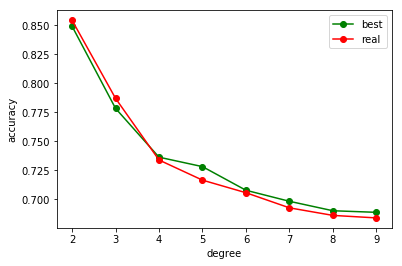

In [52]:
# for the legend, remember that we used two different axes so, we need 
# to build the legend manually
plt.plot(degree, scores, 'go-', label = "best")
plt.plot(degree, real_scores, 'ro-', label = "real")
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Using degree=1 is the same as using a ‘linear’ kernel. Also, increasing this parameter leads to higher training times, but the accuracy decrease.

Let's try to classify the data using a random forest.

In [57]:
parameters = [{
    'max_depth': range(5,18),
    "n_estimators": [10, 30, 50, 100, 150, 200],
}]
rf = GridSearchCV(RandomForestClassifier(), parameters, cv=5, n_jobs=-1)
rf.fit(X_train, y_train)
rf_model = rf.best_estimator_
print("Random forest: best score- {}, best params- {}".format(rf.best_score_, rf.best_params_))

Random forest: best score- 0.9551630434782609, best params- {'max_depth': 17, 'n_estimators': 100}


In [56]:
y_rf = rf_model.predict(X_test) 
test_accarusy = sum(1 for i, j in zip(y_rf, y_test) if i == j)
print("Accuracy on training set: ", test_accarusy/(len(y_test)))
print(classification_report(y_test, y_rf))

Accuracy on training set:  0.9326818675352877
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       570
           1       0.93      0.89      0.91       351

   micro avg       0.93      0.93      0.93       921
   macro avg       0.93      0.93      0.93       921
weighted avg       0.93      0.93      0.93       921



In the next part, I was trying to reduce the dimension of the data by PCA with different thresholds.

In [58]:
def PCA_thresholds(classifier):
    pca_k = [0.8, 0.85, 0.9, 0.95, 0.99]
    num_f = []
    acc = []
    for k in pca_k:
        pca = PCA(k)
        pca.fit(X)
        X_pca = pca.fit_transform(X)
        X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size = 0.20)  
        classifier.fit(X_train_pca, y_train)  
        y_scv_pca = classifier.predict(X_test_pca) 
        test_accarusy = sum(1 for i, j in zip(y_scv_pca, y_test) if i == j)/len(y_test)
        acc.append(test_accarusy)
        num_f.append(X_train_pca.shape[1])
        print(X_train_pca.shape, test_accarusy)
    return pca_k, num_f, acc

Show how changes accuracy for SVC while reducing the dimension.

In [69]:
classifier = SVC(gamma='scale')  
pca_k, num_f, acc = PCA_thresholds(classifier)

(3680, 35) 0.9337676438653637
(3680, 39) 0.9305103148751357
(3680, 43) 0.9305103148751357
(3680, 48) 0.9391965255157437
(3680, 54) 0.9250814332247557


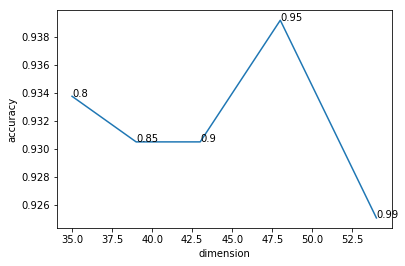

In [70]:
i =0
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(num_f, acc)
plt.xlabel('dimension')
plt.ylabel('accuracy')
for xy in zip(num_f, acc):                                      
    ax.annotate(pca_k[i], xy=xy)
    i+=1
plt.show()

In [71]:
print('The best accuracy =0.9425 for threshold = 0.9, count of attributes = 43')

The best accuracy =0.9425 for threshold = 0.9, count of attributes = 43


For RandomForestClassifier use the best hyperparameters which we got earlier

In [72]:
classifier = RandomForestClassifier(n_estimators= 100, max_depth= 17)  
pca_k, num_f, acc = PCA_thresholds(classifier)

(3680, 35) 0.9207383279044516
(3680, 39) 0.9250814332247557
(3680, 43) 0.9413680781758957
(3680, 48) 0.9229098805646037
(3680, 54) 0.9272529858849077


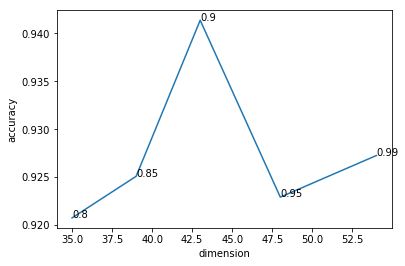

In [73]:
i =0
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(num_f, acc)
plt.xlabel('dimension')
plt.ylabel('accuracy')
for xy in zip(num_f, acc):                                      
    ax.annotate(pca_k[i], xy=xy)
    i+=1
plt.show()